In [103]:
## MP 573 Lecture 24: Convergence of sequences of random variables: LLN and CLT
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

## Law of large numbers (LLN)

The law of large numbers (LLN) states that if we have a sequence of independent random variables $X_n$ that  have the same mean $\mu$, i.e., $E(X_n) = \mu$ for all $n$, then the sample average:

$$\bar{X}_n = \frac{1}{n}(X_1 + X_2 + \cdots + X_n)$$

converges to $\mu$ as $n$ grows. In mathematical terms,

$$\lim_{n \to \infty} \bar{X}_n  = \mu$$

> **(Law of large numbers)** The LLN guarantees that the sample average $\bar{X}_n$ converges to a constant with value $\mu$. For example, the weak LLN states that this convergence happens in probability, i.e., $\bar{X}_n  \overset{p.}{\longrightarrow}  \mu$. Equivalently for any $\epsilon>0$: $$\lim_{n \to \infty} P(|\bar{X}_n - \mu| > \epsilon ) = 0$$


The LLN is widely used (under certain conditions) to estimate means of random variables by averaging multiple independently-drawn samples, or to denoise signals by averaging multiple noisy versions, to establish the consistency of estimators, or to characterize Monte-Carlo methods. 


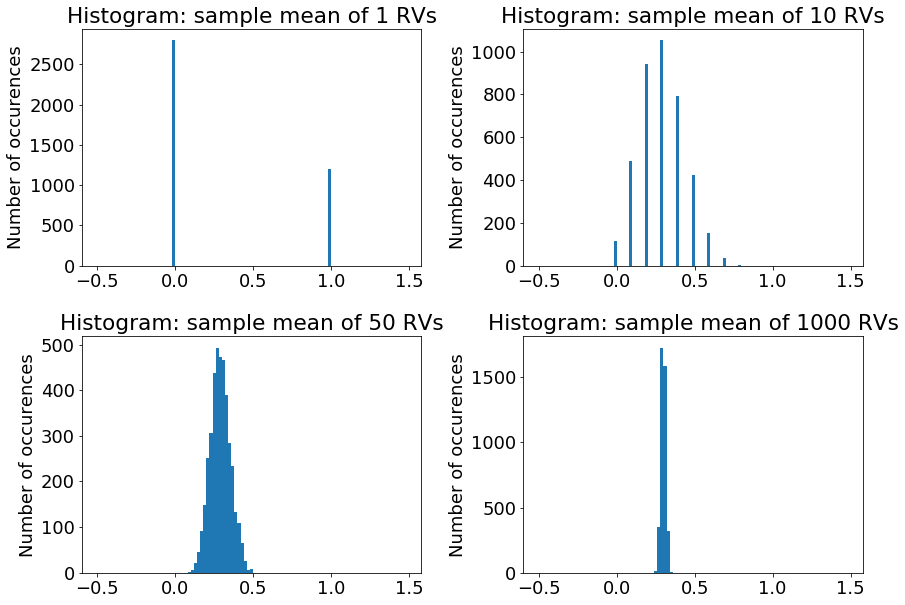

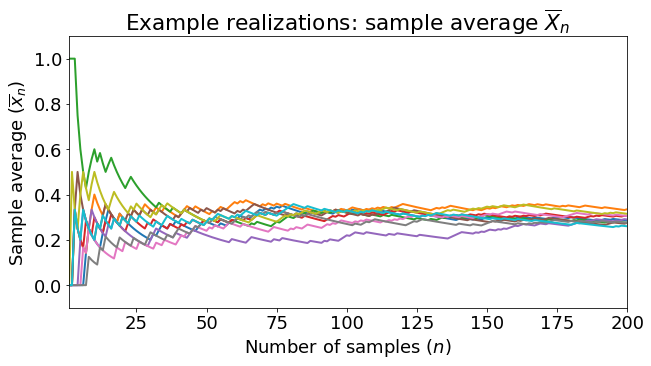

In [109]:
# Bernuilli distribution with parameter p
p = 0.5;

# Number of averages
Ave = [1,10,50,1000]

# Number of trials
N = 4000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.bernoulli.rvs(p, size=[N,Ave[k]])
    xbar = np.mean(x,axis=1)
    plt.subplot(2,2,k+1)
    plt.title('Histogram: sample mean of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(xbar, bins=np.arange(-0.5,+1.5,0.02))
    plt.ylabel('Number of occurences');


# Now generate a couple sequences Y_n
n_max = 200
trials = 10
Ave = np.arange(n_max) + 1
xbar = 0.0*np.zeros((trials,n_max))
x = stats.bernoulli.rvs(p, size=[trials,n_max])
for k in np.arange(n_max):
    xcur = 1.0*x[:,0:(k+1)]
    xbar[:,k] = np.sum(xcur,axis=1)/(k+1)
    
# Plot the sequence of sample averages
plt.rc('font', **font)
fig = plt.figure(figsize=(10,5))
plt.plot(Ave,xbar.T,linewidth=2.0)
plt.axis([1,n_max,-0.1,1.1])
plt.xlabel('Number of samples ($n$)')
plt.ylabel('Sample average ($\overline{x}_n$)')
plt.title('Example realizations: sample average $\overline{X}_n$');


## Central limit theorem (CLT)

Suppose we have a sequence of $n$ i.i.d. random variables  $X_1, X_2, \cdots, X_n$, each with mean $\mu$ and variance $\sigma^2$ (which is required to be finite). In order to simplify our analysis, instead of considering the sample average of these $n$ random variables, we will consider a normalized sum where we will also subtract the average, as follows:

$$Y_n = \frac{\sum_{k=1}^n X_k - n \mu}{\sqrt{n}}$$

Note that the subtraction of $n \mu$ in the numerator leads to $E[Y_n] = 0$, i.e., enables us to center our sequence of random variables at zero. Further, the division by $\sqrt{n}$ enables us to stabilize the variance  $E[Y_n^2] = \sigma^2$: if we did not have a denominator, the variance of the numerator would grow unbounded as $n$ grows, whereas if the denominator was $n$ as in the sample average, the variance would decrease to zero as $n$ grows. Instead, the normalized sum in Eq.~\ref{eq:norm_sum_CLT} maintains a mean of zero and a constant variance of $\sigma^2$ for any $n$.

This setup allows us to state the central limit theorem (CLT): 
> **(Central limit theorem)** The normalized  sum sequence $Y_n$ converges in distribution to a Gaussian random variable with mean $0$ and variance $\sigma^2$, as $n \longrightarrow \infty$. 

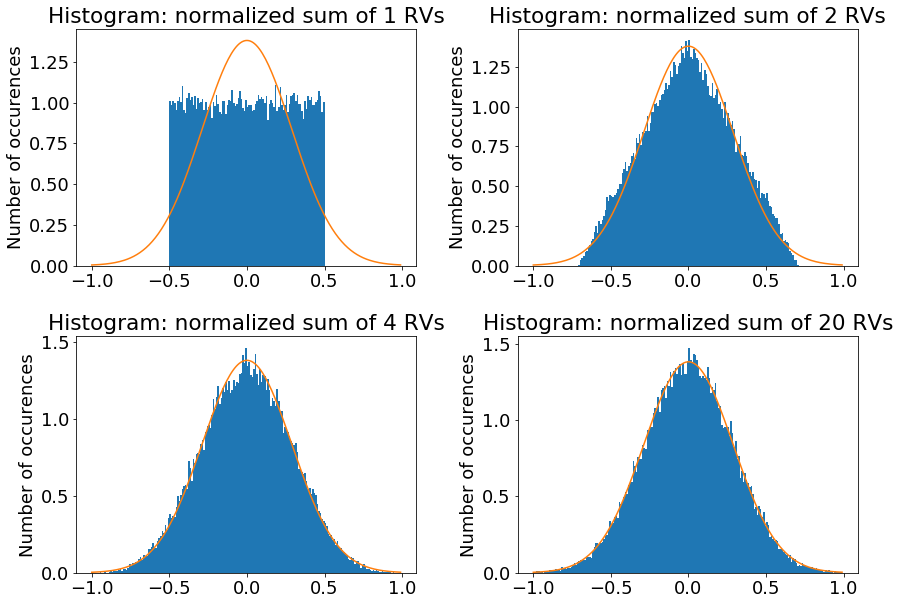

In [101]:
# Uniform example
# Distribution parameters
a = -0.5
b = 0.5
mu = (b+a)/2
var = 1/12*(b-a)**2

# Gaussian of mean zero and variance 1/12
x = np.arange(a-0.5,b+0.5,0.01)
pdf_gauss = stats.norm.pdf(x,mu,np.sqrt(var))


# Number of averages
Ave = [1,2,4,20]

# Number of trials
N = 50000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    r = stats.uniform.rvs(a, b-a, size=[N,Ave[k]])
    r = np.sum(r,axis=1)/np.sqrt(Ave[k])
    plt.subplot(2,2,k+1)
    plt.title('Histogram: normalized sum of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(r, bins=np.arange(a-0.5,b+0.5,0.01), density=True) # Histogram is normalized to integrate to 1 (ie: empirical PDF)
    plt.plot(x,pdf_gauss)
    #plt.xlabel('Generated value x');
    plt.ylabel('Number of occurences');